# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from pandas._libs.lib import infer_datetimelike_array

# Arima

## Nigeria Arima

In [ ]:
nga = pd.read_csv("/content/drive/MyDrive/nigeria-immigration-statistics (2).csv",
parse_dates=["date"],
index_col="date")

In [ ]:
# Check for missing data
missing_data = nga.isnull().sum()
if missing_data.sum() > 0:
    print("Missing data found:")
else:
    print("Non-missing data found.")

# Check for duplicates
# Convert the columns containing lists and dictionaries to tuples before checking for duplicates
nga_copy = nga.copy()
for col in nga_copy.columns:
    if isinstance(nga_copy[col].iloc[0], list):
        nga_copy[col] = nga_copy[col].apply(tuple)
    elif isinstance(nga_copy[col].iloc[0], dict):
        nga_copy[col] = nga_copy[col].apply(tuple)

duplicates = nga_copy.duplicated().sum()
if duplicates > 0:
    print("Duplicates found:")
else:
    print("No duplicates found.")

# Check for outliers
# Assuming you want to check for outliers in numeric columns
numeric_columns = nga.select_dtypes(include='number').columns
outliers = []
for column in numeric_columns:
    q1 = nga[column].quantile(0.25)
    q3 = nga[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_outliers = nga[(nga[column] < lower_bound) | (nga[column] > upper_bound)]
    outliers.append(column_outliers)

# Concatenate the individual DataFrames in the 'outliers' list into a single DataFrame
combined_outliers = pd.concat(outliers)

if len(combined_outliers) > 0:
    print("Outliers found:")
else:
    print("No outliers found.")

Non-missing data found.
No duplicates found.
Outliers found:


In [ ]:
from pandas._libs.lib import infer_datetimelike_array
# Function to handle outliers by capping or flooring
def cap_floor_outliers(nga, column, threshold):
    q1 = nga[column].quantile(0.25)
    q3 = nga[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    nga[column] = nga[column].clip(lower_bound, upper_bound)
    return nga

# Check for outliers
# Assuming you want to check for outliers in numeric columns
numeric_columns = nga.select_dtypes(include='number').columns
outliers = []

for column in numeric_columns:
    q1 = nga[column].quantile(0.25)
    q3 = nga[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_outliers = nga[(nga[column] < lower_bound) | (nga[column] > upper_bound)]
    outliers.append(column_outliers)

# Concatenate the individual DataFrames in the 'outliers' list into a single DataFrame
combined_outliers = pd.concat(outliers)

# Handle outliers by capping or flooring
threshold = 1.5
for column in numeric_columns:
    nga = cap_floor_outliers(nga, column, threshold)

if len(combined_outliers) > 0:
    print("Outliers handled.")
else:
    print("outliers found.")


Outliers handled.


In [ ]:
print (nga)

            Migrant Population  % of Total Population
date                                                 
1960-01-01               94133               0.480000
1965-01-01              121891               0.480000
1970-01-01              157835               0.480000
1975-01-01              704377               0.480000
1980-01-01             1314845               0.480000
1985-01-01              347909               0.480000
1990-01-01              456621               0.477600
1995-01-01              462999               0.465625
2000-01-01              487882               0.465625
2005-01-01              648019               0.465625
2010-01-01              920118               0.488625
2015-01-01             1199115               0.488625


In [ ]:
# Add 2020 migration data to dataset
new_row_data = {'Migrant Population': 1700000, '% of Total Population': 1.3000}
new_row_index = pd.to_datetime('2020-01-01')  # Convert to datetime

# Creating a new row as a Pandas Series
new_row = pd.Series(new_row_data, name=new_row_index)

# Adding the new row to the dataframe
nga = nga.append(new_row)

print(nga)

            Migrant Population  % of Total Population
date                                                 
1960-01-01             94133.0               0.480000
1965-01-01            121891.0               0.480000
1970-01-01            157835.0               0.480000
1975-01-01            704377.0               0.480000
1980-01-01           1314845.0               0.480000
1985-01-01            347909.0               0.480000
1990-01-01            456621.0               0.477600
1995-01-01            462999.0               0.465625
2000-01-01            487882.0               0.465625
2005-01-01            648019.0               0.465625
2010-01-01            920118.0               0.488625
2015-01-01           1199115.0               0.488625
2020-01-01           1700000.0               1.300000


<ipython-input-46-62345d7e36c7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nga = nga.append(new_row)


In [ ]:
# Select the 'Migrant Population' column for modeling
column_data = nga['Migrant Population']

# Fit ARIMA model
model = ARIMA(column_data, order=(5, 1, 2))  # You can adjust the order as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA param

                               SARIMAX Results                                
Dep. Variable:     Migrant Population   No. Observations:                   13
Model:                 ARIMA(5, 1, 2)   Log Likelihood           -49894297.794
Date:                Mon, 18 Sep 2023   AIC                       99788611.588
Time:                        13:38:24   BIC                       99788615.467
Sample:                    01-01-1960   HQIC                      99788610.152
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3145   6.11e-08  -2.15e+07      0.000      -1.314      -1.314
ar.L2         -1.2150   7.15e-08   -1.7e+07      0.000      -1.215      -1.215
ar.L3         -1.2154   5.34e-08  -2.28e+07      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast_steps = 5  # Adjust the steps as needed
forecast = model_fit.forecast(steps=forecast_steps)
print (forecast) #skipping the predictionby5

2025-01-01    7.436583e+05
2030-01-01    5.948301e+05
2035-01-01    7.049198e+05
2040-01-01    9.661851e+05
2045-01-01    1.426294e+06
Freq: 5AS-JAN, Name: predicted_mean, dtype: float64


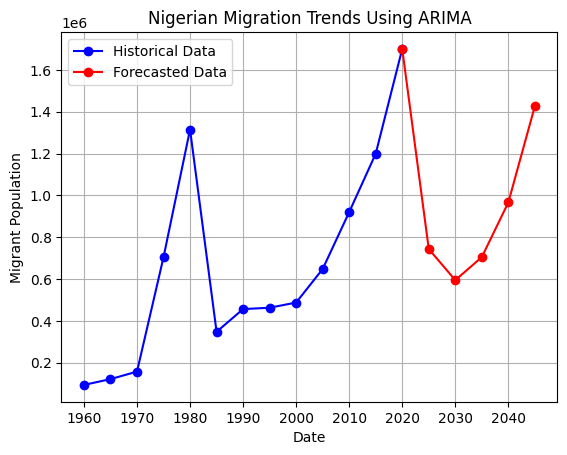

In [ ]:
# Plot historical data in blue with dots
plt.plot(column_data.index, column_data.values, color='blue', marker='o', label='Historical Data')

# Plot forecasted data in red with dots
forecast_index = pd.date_range(start=column_data.index[-1], periods=forecast_steps + 1, freq='5AS-JAN')
forecast_values = [column_data.iloc[-1]] + forecast.tolist()  # Combine last historical value with forecasted values
plt.plot(forecast_index, forecast_values, color='red', marker='o', label='Forecasted Data')

plt.xlabel('Date')
plt.ylabel('Migrant Population')
plt.title('Nigerian Migration Trends Using ARIMA')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

## Calculate RMSE and MAPE Metrics
The Root Mean Square Error (RMSE) and The Mean Absolute Percentage Error (MAPE), will be calculated by with the last five series of historical data and the 5 series of predicted value

In [ ]:
historical_data = [487882.0, 648019.0 , 920118.0, 1199115.0, 1700000.0]
rmse = np.sqrt(np.mean((historical_data - forecast)**2))
mape = 100 * np.mean(np.abs((historical_data - forecast) / historical_data))
print(f'Nigeria RMSE: {rmse}')
print(f'Nigeria MAPE: {mape}%')

Nigeria RMSE: 220785.99856044358
Nigeria MAPE: 23.909481006109353%


## India Arima

In [ ]:
india = pd.read_csv("/content/drive/MyDrive/india-immigration-statistics (1).csv",
parse_dates=["date"],
index_col="date")

In [ ]:
# Check for missing data
missing_data = india.isnull().sum()
if missing_data.sum() > 0:
    print("Missing data found:")
else:
    print("Non-missing data found.")

# Check for duplicates
# Convert the columns containing lists and dictionaries to tuples before checking for duplicates
india_copy = india.copy()
for col in india_copy.columns:
    if isinstance(india_copy[col].iloc[0], list):
        india_copy[col] = india_copy[col].apply(tuple)
    elif isinstance(india_copy[col].iloc[0], dict):
        india_copy[col] = india_copy[col].apply(tuple)

duplicates = india_copy.duplicated().sum()
if duplicates > 0:
    print("Duplicates found:")
else:
    print("No duplicates found.")

# Check for outliers
# Assuming you want to check for outliers in numeric columns
numeric_columns = india.select_dtypes(include='number').columns
outliers = []
for column in numeric_columns:
    q1 = india[column].quantile(0.25)
    q3 = india[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_outliers = india[(india[column] < lower_bound) | (india[column] > upper_bound)]
    outliers.append(column_outliers)

# Concatenate the individual DataFrames in the 'outliers' list into a single DataFrame
combined_outliers = pd.concat(outliers)

if len(combined_outliers) > 0:
    print("Outliers found:")
else:
    print("No outliers found.")

Non-missing data found.
No duplicates found.
No outliers found.


In [ ]:
print (india)

            Migrant Population  % of Total Population
date                                                 
1960-12-31             9410535                 0.0000
1965-12-31             9350557                 0.0000
1970-12-31             9181520                 0.0000
1975-12-31             9011238                 0.0000
1980-12-31             8845466                 0.0000
1985-12-31             8131017                 0.0000
1990-12-31             7493204                 0.8607
1995-12-31             6952238                 0.7235
2000-12-31             6411272                 0.6086
2005-12-31             5923642                 0.5177
2010-12-31             5436012                 0.4416
2015-12-31             5240960                 0.3998


In [ ]:
# Add 2020 migration data to dataset
new_row_data = {'Migrant Population': 2500000, '% of Total Population': 0.1790}
new_row_index = pd.to_datetime('2020-01-01')  # Convert to datetime

# Creating a new row as a Pandas Series
new_row = pd.Series(new_row_data, name=new_row_index)

# Adding the new row to the dataframe
india = india.append(new_row)

print(india)

            Migrant Population  % of Total Population
date                                                 
1960-12-31           9410535.0                 0.0000
1965-12-31           9350557.0                 0.0000
1970-12-31           9181520.0                 0.0000
1975-12-31           9011238.0                 0.0000
1980-12-31           8845466.0                 0.0000
1985-12-31           8131017.0                 0.0000
1990-12-31           7493204.0                 0.8607
1995-12-31           6952238.0                 0.7235
2000-12-31           6411272.0                 0.6086
2005-12-31           5923642.0                 0.5177
2010-12-31           5436012.0                 0.4416
2015-12-31           5240960.0                 0.3998
2020-01-01           2500000.0                 0.1790


<ipython-input-54-d58a858ec67c>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  india = india.append(new_row)


In [ ]:
# Select the 'Migrant Population' column for modeling
column_data2 = india['Migrant Population']

# Fit ARIMA model
model2 = ARIMA(column_data2, order=(5, 1, 2))  #AR- lag observation I-time diff to be stationary MA-num of lagged forecast errors in the model
model2_fit = model2.fit()

# Print model summary
print(model2_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:     Migrant Population   No. Observations:                   13
Model:                 ARIMA(5, 1, 2)   Log Likelihood         -1596658398.158
Date:                Mon, 18 Sep 2023   AIC                     3193316812.315
Time:                        13:38:26   BIC                     3193316816.195
Sample:                             0   HQIC                    3193316810.879
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9091   7.62e-09  -1.19e+08      0.000      -0.909      -0.909
ar.L2          1.7736   6.36e-09   2.79e+08      0.000       1.774       1.774
ar.L3          1.8611   4.63e-09   4.02e+08      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast_steps2 = 5  # Adjust the steps as needed
forecast2 = model2_fit.forecast(steps=forecast_steps2)
print (forecast2)

13    4.652106e+06
14   -2.643981e+06
15    3.320025e+06
16   -8.731066e+06
17    1.684569e+05
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


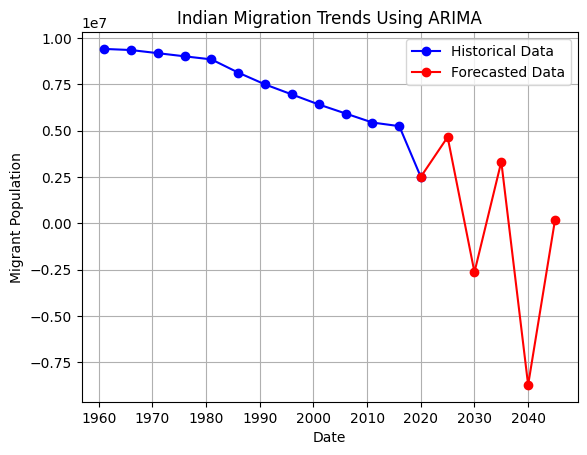

In [ ]:
# Plot historical data in blue with dots
plt.plot(column_data2.index, column_data2.values, color='blue', marker='o', label='Historical Data')

# Plot forecasted data in red with dots
forecast2_index = pd.date_range(start=column_data2.index[-1], periods=forecast_steps2 + 1, freq='5AS-JAN')
forecast2_values = [column_data2.iloc[-1]] + forecast2.tolist()  # Combine last historical value with forecasted values
plt.plot(forecast2_index, forecast2_values, color='red', marker='o', label='Forecasted Data')

plt.xlabel('Date')
plt.ylabel('Migrant Population')
plt.title('Indian Migration Trends Using ARIMA')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

## Calculate RMSE and MAPE Metrics
The Root Mean Square Error (RMSE) and The Mean Absolute Percentage Error (MAPE), will be calculated by with the last five series of historical data and the 5 series of predicted value

In [ ]:
historical_data2 = [6411272.0, 5923642.0, 5436012.0, 5240960.0, 2500000.0]
rmse = np.sqrt(np.mean((historical_data2 - forecast2)**2)) #is a frequently used measure of the differences between values predicted by a model & the actual values
mape = 100 * np.mean(np.abs((historical_data2 - forecast2) / historical_data2)) #for measuring accuracy of a predicted model
print(f'India RMSE: {rmse}')
print(f'India MAPE: {mape}%')

India RMSE: 7505062.849628294
India MAPE: 114.17059725126603%


# **GDP Per Capital And Migration Population Correlation**

## Nigeria

In [ ]:
gdp_nga = pd.read_csv("/content/drive/MyDrive/nga-wdi.csv")

# Filter rows with specific Series Names
selected_rows = gdp_nga[gdp_nga['Series Name'].isin(['GDP (current US$)', 'GDP growth (annual %)'])]

# Sort the selected rows by 'Country Name'
gdp_nga = selected_rows.sort_values(by=['Country Name'])

# Display the sorted selected rows
print(gdp_nga)

   Country Name Country Code            Series Name        Series Code  \
31      Nigeria          NGA      GDP (current US$)     NY.GDP.MKTP.CD   
32      Nigeria          NGA  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   

       1990 [YR1990]     2000 [YR2000]     2013 [YR2013]     2014 [YR2014]  \
31  54035795387.8086  69448962760.8787  520117163617.721  574183825592.358   
32  11.7768859342069  5.01593475720539  6.67133539288378  6.30971865572383   

       2015 [YR2015]      2016 [YR2016]      2017 [YR2017]     2018 [YR2018]  \
31  493026782401.561   404649048648.026   375745732274.676  421739210176.152   
32  2.65269329541835  -1.61686894991816  0.805886619542704  1.92275734157302   

       2019 [YR2019]      2020 [YR2020]     2021 [YR2021]     2022 [YR2022]  
31  474517470742.749   432198936002.177  440833583992.485  477386120635.845  
32   2.2084292771582  -1.79425308233591  3.64718654100696  3.25168140839833  


In [ ]:
# Re-arrange Dataset

# Create a column name mapping dictionary
column_mapping = {'1990 [YR1990]': '1990',
                  '2000 [YR2000]': '2000',
                  '2013 [YR2013]': '2013',
                  '2014 [YR2014]': '2014',
                  '2015 [YR2015]': '2015',
                  '2016 [YR2016]': '2016',
                  '2017 [YR2017]': '2017',
                  '2018 [YR2018]': '2018',
                  '2019 [YR2019]': '2019',
                  '2020 [YR2020]': '2020',
                  '2021 [YR2021]': '2021',
                  '2022 [YR2022]': '2022'}

# Rename the column using the mapping
gdp_nga.rename(columns=column_mapping, inplace=True)

# Display the sorted selected rows
print(gdp_nga)

   Country Name Country Code            Series Name        Series Code  \
31      Nigeria          NGA      GDP (current US$)     NY.GDP.MKTP.CD   
32      Nigeria          NGA  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   

                1990              2000              2013              2014  \
31  54035795387.8086  69448962760.8787  520117163617.721  574183825592.358   
32  11.7768859342069  5.01593475720539  6.67133539288378  6.30971865572383   

                2015               2016               2017              2018  \
31  493026782401.561   404649048648.026   375745732274.676  421739210176.152   
32  2.65269329541835  -1.61686894991816  0.805886619542704  1.92275734157302   

                2019               2020              2021              2022  
31  474517470742.749   432198936002.177  440833583992.485  477386120635.845  
32   2.2084292771582  -1.79425308233591  3.64718654100696  3.25168140839833  


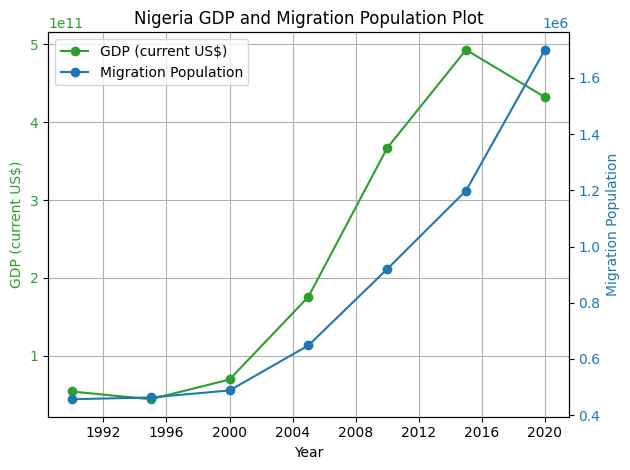

In [ ]:
# Create dataframes for the provided data
gdp_nga = {
    'Year': ['1990', '1995', '2000', '2005', '2010', '2015', '2020'],
    'GDP (current US$)': [54035795387.8086, 44060000000, 69448962760.8787, 175700000000, 367000000000, 493026782401.561, 432198936002.177],
}

migration_nga = {
    'Year': ['1990', '1995', '2000', '2005', '2010', '2015', '2020'],
    'Migration Population': [456621, 462999, 487882, 648019, 920118, 1199115, 1700000]
}

gdp_nga = pd.DataFrame(gdp_nga)
migration_nga = pd.DataFrame(migration_nga)

# Convert 'Year' to datetime for proper plotting
gdp_nga['Year'] = pd.to_datetime(gdp_nga['Year'])
migration_nga['Year'] = pd.to_datetime(migration_nga['Year'])

# Plot the merged line graph
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.grid(True)  # Add grid lines

# Plot GDP data
color = 'tab:green'
ax1.set_ylabel('GDP (current US$)', color=color)
ax1.plot(gdp_nga['Year'], gdp_nga['GDP (current US$)'], 'o-', color=color, label='GDP (current US$)')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Migration Population
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Migration Population', color=color)
ax2.plot(migration_nga['Year'], migration_nga['Migration Population'], 'o-', color=color, label='Migration Population')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title and show plot
plt.title('Nigeria GDP and Migration Population Plot')
fig.tight_layout()
plt.show()

### Metrics To Evaluate

In [ ]:
# Function to calculate Compound Annual Growth Rate (CAGR) is the rate of return (RoR) that will be required for an investment to grow from its begining balance to ending balance
def calculate_cagr(ending_value, beginning_value, years):
    return (ending_value / beginning_value) ** (1/years) - 1

# Define the beginning and ending values and the number of years
beginning_value = 54035795387.8086
ending_value = 432198936002.177
years = 2020 - 1990  # 30 years

# Calculate CAGR
cagr = calculate_cagr(ending_value, beginning_value, years)

# Convert CAGR to percentage for better readability
cagr_percent = cagr * 100

# Print the results
print(f"CAGR (Nigeria-GDP) = {cagr:.4f} or {cagr_percent:.2f}%")

CAGR (Nigeria-GDP) = 0.0718 or 7.18%


In [ ]:
# Calculate the correlation coefficient is a statistical measure of the strength of a linear relationship between two variables.

# Merge DataFrames on 'Year'
nga_df = pd.merge(gdp_nga, migration_nga, on='Year')

# Calculate the correlation coefficient
correlation_coefficient = nga_df['GDP (current US$)'].corr(nga_df['Migration Population'])
print("Nigeria Correlation Coefficient:", correlation_coefficient)

Nigeria Correlation Coefficient: 0.8901553338456791


In [ ]:
# Calculating Year-over-Year (YoY) Change for GDP method of evaluating 2 or more measuarable event on annual basis
gdp_yoy = (gdp_nga['GDP (current US$)'].diff() / gdp_nga['GDP (current US$)'].shift()) * 100
gdp_yoy[0] = 0  # First entry will be NaN, so setting it to 0

# Calculating YoY change for Migration
migration_yoy = (migration_nga['Migration Population'].diff() / migration_nga['Migration Population'].shift()) * 100
migration_yoy[0] = 0  # First entry will be NaN, so setting it to 0

# Adding YoY columns to the original dataframes
gdp_nga['GDP (current US$)_YoY'] = gdp_yoy
migration_nga['Migration Population_YoY'] = migration_yoy

# Printing the DataFrames with YoY change
print("Nigeria GDP DataFrame with YoY Change")
print(gdp_nga)

print("\nNigeria Migration DataFrame with YoY Change")
print(migration_nga)

Nigeria GDP DataFrame with YoY Change
        Year  GDP (current US$)  GDP (current US$)_YoY
0 1990-01-01       5.403580e+10               0.000000
1 1995-01-01       4.406000e+10             -18.461457
2 2000-01-01       6.944896e+10              57.623610
3 2005-01-01       1.757000e+11             152.991539
4 2010-01-01       3.670000e+11             108.878771
5 2015-01-01       4.930268e+11              34.339723
6 2020-01-01       4.321989e+11             -12.337635

Nigeria Migration DataFrame with YoY Change
        Year  Migration Population  Migration Population_YoY
0 1990-01-01                456621                  0.000000
1 1995-01-01                462999                  1.396782
2 2000-01-01                487882                  5.374310
3 2005-01-01                648019                 32.822896
4 2010-01-01                920118                 41.989355
5 2015-01-01               1199115                 30.321872
6 2020-01-01               1700000                

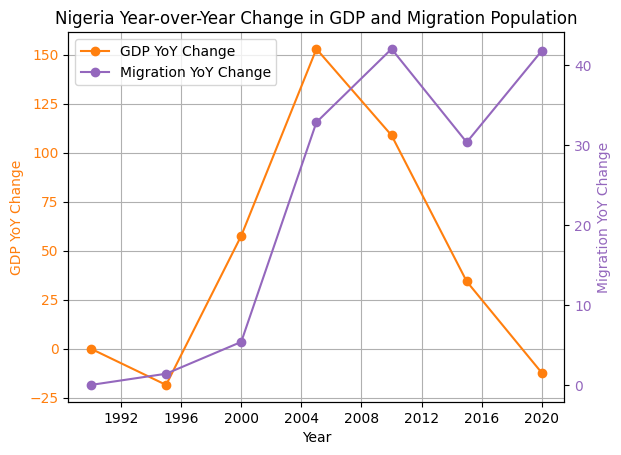

In [ ]:
# Create a plot for YoY Change method of evaluating 2 or more measuarable event on annual basis
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.grid(True)  # Add grid lines
ax1.set_ylabel('GDP YoY Change', color='tab:orange')
ax1.plot(gdp_nga['Year'], gdp_nga['GDP (current US$)_YoY'], 'o-', color='tab:orange', label='GDP YoY Change')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax2 = ax1.twinx()
ax2.set_ylabel('Migration YoY Change', color='tab:purple')
ax2.plot(migration_nga['Year'], migration_nga['Migration Population_YoY'], 'o-', color='tab:purple', label='Migration YoY Change')
ax2.tick_params(axis='y', labelcolor='tab:purple')

# Add legend and title
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Nigeria Year-over-Year Change in GDP and Migration Population')

plt.show()

In [ ]:
# Calculate Elasticity refers to the sensitivity of migration to changes in GDP
# Elasticity = % Change in Dependent Variable / % Change in Independent Variable
elasticity = migration_yoy / gdp_yoy

# Print the elasticity for each year where we have YoY data for both variables
for i, e in enumerate(elasticity):
    print(f"Elasticity for year ending in {1990 + (i + 1) * 5} is {e:.2f}")

Elasticity for year ending in 1995 is nan
Elasticity for year ending in 2000 is -0.08
Elasticity for year ending in 2005 is 0.09
Elasticity for year ending in 2010 is 0.21
Elasticity for year ending in 2015 is 0.39
Elasticity for year ending in 2020 is 0.88
Elasticity for year ending in 2025 is -3.39


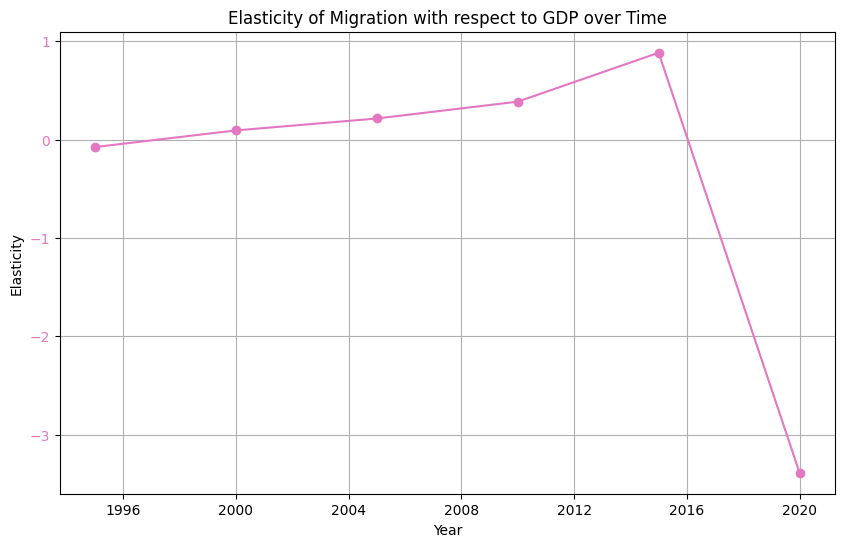

In [ ]:
# Plot Elasticity refers to the sensitivity of migration to changes in GDP
color = 'tab:pink'

plt.figure(figsize=(10, 6))
plt.plot(gdp_nga['Year'][1:], elasticity[1:], marker='o', color=color)  # skip the first year as its YoY is NaN
plt.xlabel('Year')
# Add color to y-label
plt.ylabel('Elasticity')
plt.title('Elasticity of Migration with respect to GDP over Time')
plt.grid(True)  # Add grid lines
# If you want to change tick colors too
ax1 = plt.gca()
ax1.tick_params(axis='y', labelcolor=color)
plt.show()

## India

In [ ]:
gdp_india = pd.read_csv("/content/drive/MyDrive/india-wdi.csv")

# Filter rows with specific Series Names
selected_rows = gdp_india[gdp_india['Series Name'].isin(['GDP (current US$)', 'GDP growth (annual %)'])]

# Sort the selected rows by 'Country Name'
gdp_india = selected_rows.sort_values(by=['Country Name'])

# Display the sorted selected rows
print(gdp_india)

   Country Name Country Code            Series Name        Series Code  \
31        India          IND      GDP (current US$)     NY.GDP.MKTP.CD   
32        India          IND  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   

       1990 [YR1990]     2000 [YR2000]     2013 [YR2013]     2014 [YR2014]  \
31  320979026420.035   468394937262.37  1856721494834.64  2039126469963.35   
32  5.53345456125301  3.84099115681285  6.38610640094825  7.41022760508854   

       2015 [YR2015]     2016 [YR2016]     2017 [YR2017]     2018 [YR2018]  \
31  2103588347241.77  2294796889945.04  2651474263257.15   2702929639861.5   
32  7.99625378571471  8.25630550179086  6.79538341897911  6.45385134497769   

       2019 [YR2019]      2020 [YR2020]     2021 [YR2021]     2022 [YR2022]  
31  2835606242052.48    2671595389575.7  3150306834279.65  3385089881935.39  
32  3.87143694070356  -5.83105322031207  9.05027790774051  7.00295154446648  


In [ ]:
# Re-arrange Dataset

# Create a column name mapping dictionary
column_mapping = {'1990 [YR1990]': '1990',
                  '2000 [YR2000]': '2000',
                  '2013 [YR2013]': '2013',
                  '2014 [YR2014]': '2014',
                  '2015 [YR2015]': '2015',
                  '2016 [YR2016]': '2016',
                  '2017 [YR2017]': '2017',
                  '2018 [YR2018]': '2018',
                  '2019 [YR2019]': '2019',
                  '2020 [YR2020]': '2020',
                  '2021 [YR2021]': '2021',
                  '2022 [YR2022]': '2022'}

# Rename the column using the mapping
gdp_india.rename(columns=column_mapping, inplace=True)

# Display the sorted selected rows
print(gdp_india)

   Country Name Country Code            Series Name        Series Code  \
31        India          IND      GDP (current US$)     NY.GDP.MKTP.CD   
32        India          IND  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   

                1990              2000              2013              2014  \
31  320979026420.035   468394937262.37  1856721494834.64  2039126469963.35   
32  5.53345456125301  3.84099115681285  6.38610640094825  7.41022760508854   

                2015              2016              2017              2018  \
31  2103588347241.77  2294796889945.04  2651474263257.15   2702929639861.5   
32  7.99625378571471  8.25630550179086  6.79538341897911  6.45385134497769   

                2019               2020              2021              2022  
31  2835606242052.48    2671595389575.7  3150306834279.65  3385089881935.39  
32  3.87143694070356  -5.83105322031207  9.05027790774051  7.00295154446648  


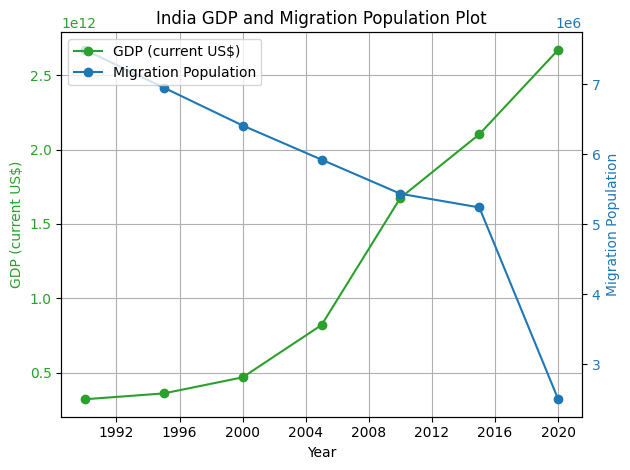

In [ ]:
# Create dataframes for plot
gdp_india = {
    'Year': ['1990', '1995', '2000', '2005', '2010', '2015', '2020'],
    'GDP (current US$)': [320979026420.035, 360300000000, 468394937262.37, 820400000000, 1676000000000,
                          2103588347241.77, 2671595389575.7],
}

migration_india = {
    'Year': ['1990', '1995', '2000', '2005', '2010', '2015', '2020'],
    'Migration Population': [7493204, 6952238, 6411272, 5923642, 5436012, 5240960, 2500000]
}

gdp_india = pd.DataFrame(gdp_india)
migration_india = pd.DataFrame(migration_india)

# Convert 'Year' to datetime for proper plotting
gdp_india['Year'] = pd.to_datetime(gdp_india['Year'])
migration_india['Year'] = pd.to_datetime(migration_india['Year'])

# Plot the merged line graph
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.grid(True)  # Add grid lines

# Plot GDP data
color = 'tab:green'
ax1.set_ylabel('GDP (current US$)', color=color)
ax1.plot(gdp_india['Year'], gdp_india['GDP (current US$)'], 'o-', color=color, label='GDP (current US$)')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Migration Population
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Migration Population', color=color)
ax2.plot(migration_india['Year'], migration_india['Migration Population'], 'o-', color=color, label='Migration Population')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set title and show plot
plt.title('India GDP and Migration Population Plot')
fig.tight_layout()
plt.show()

### Metrics To Evaluate

In [ ]:
# Function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(ending_value, beginning_value, years):
    return (ending_value / beginning_value) ** (1/years) - 1

# Define the beginning and ending values and the number of years
beginning_value = 320979026420.035
ending_value = 2671595389575.7
years = 2020 - 1990  # 30 years

# Calculate CAGR
cagr = calculate_cagr(ending_value, beginning_value, years)

# Convert CAGR to percentage for better readability
cagr_percent = cagr * 100

# Print the results
print(f"CAGR (India-GDP) = {cagr:.4f} or {cagr_percent:.2f}%")

CAGR (India-GDP) = 0.0732 or 7.32%


In [ ]:
# Calculate the correlation coefficient

# Merge DataFrames on 'Year'
india_df = pd.merge(gdp_india, migration_india, on='Year')

# Calculate the correlation coefficient
correlation_coefficient = india_df['GDP (current US$)'].corr(india_df['Migration Population'])
print("India Correlation Coefficient:", correlation_coefficient)

India Correlation Coefficient: -0.9195569861727496


In [ ]:
# Calculating Year-over-Year (YoY) Change for GDP
gdp_yoy2 = (gdp_india['GDP (current US$)'].diff() / gdp_india['GDP (current US$)'].shift()) * 100
gdp_yoy2[0] = 0  # First entry will be NaN, so setting it to 0

# Calculating YoY change for Migration
migration_yoy2 = (migration_india['Migration Population'].diff() / migration_india['Migration Population'].shift()) * 100
migration_yoy2[0] = 0  # First entry will be NaN, so setting it to 0

# Adding YoY columns to the original dataframes
gdp_india['GDP (current US$)_YoY'] = gdp_yoy2
migration_india['Migration Population_YoY'] = migration_yoy2

# Printing the DataFrames with YoY change
print("India GDP DataFrame with YoY Change")
print(gdp_india)

print("\nIndia Migration DataFrame with YoY Change")
print(migration_india)

India GDP DataFrame with YoY Change
        Year  GDP (current US$)  GDP (current US$)_YoY
0 1990-01-01       3.209790e+11               0.000000
1 1995-01-01       3.603000e+11              12.250325
2 2000-01-01       4.683949e+11              30.001370
3 2005-01-01       8.204000e+11              75.151338
4 2010-01-01       1.676000e+12             104.290590
5 2015-01-01       2.103588e+12              25.512431
6 2020-01-01       2.671595e+12              27.001815

India Migration DataFrame with YoY Change
        Year  Migration Population  Migration Population_YoY
0 1990-01-01               7493204                  0.000000
1 1995-01-01               6952238                 -7.219422
2 2000-01-01               6411272                 -7.781178
3 2005-01-01               5923642                 -7.605823
4 2010-01-01               5436012                 -8.231929
5 2015-01-01               5240960                 -3.588145
6 2020-01-01               2500000                -52.

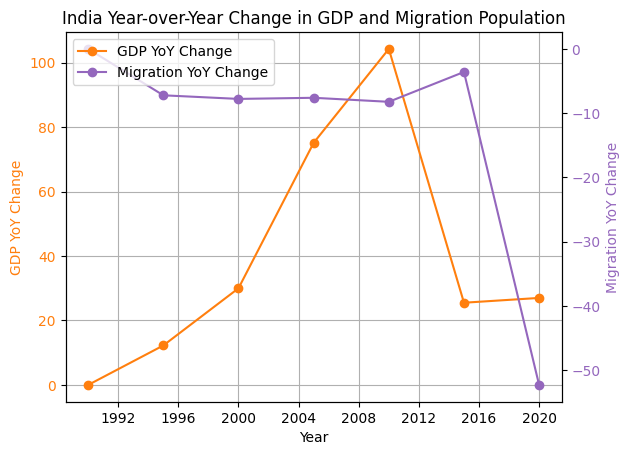

In [ ]:
# Create a plot for YoY Change
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.grid(True)  # Add grid lines
ax1.set_ylabel('GDP YoY Change', color='tab:orange')
ax1.plot(gdp_india['Year'], gdp_india['GDP (current US$)_YoY'], 'o-', color='tab:orange', label='GDP YoY Change')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax2 = ax1.twinx()
ax2.set_ylabel('Migration YoY Change', color='tab:purple')
ax2.plot(migration_india['Year'], migration_india['Migration Population_YoY'], 'o-', color='tab:purple', label='Migration YoY Change')
ax2.tick_params(axis='y', labelcolor='tab:purple')

# Add legend and title
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('India Year-over-Year Change in GDP and Migration Population')

plt.show()

In [ ]:
# Calculate Elasticity
# Elasticity = % Change in Dependent Variable / % Change in Independent Variable
elasticity2 = migration_yoy2 / gdp_yoy2

# Print the elasticity for each year where we have YoY data for both variables
for i, e in enumerate(elasticity2):
    print(f"Elasticity for year ending in {1990 + (i + 1) * 5} is {e:.2f}")

Elasticity for year ending in 1995 is nan
Elasticity for year ending in 2000 is -0.59
Elasticity for year ending in 2005 is -0.26
Elasticity for year ending in 2010 is -0.10
Elasticity for year ending in 2015 is -0.08
Elasticity for year ending in 2020 is -0.14
Elasticity for year ending in 2025 is -1.94


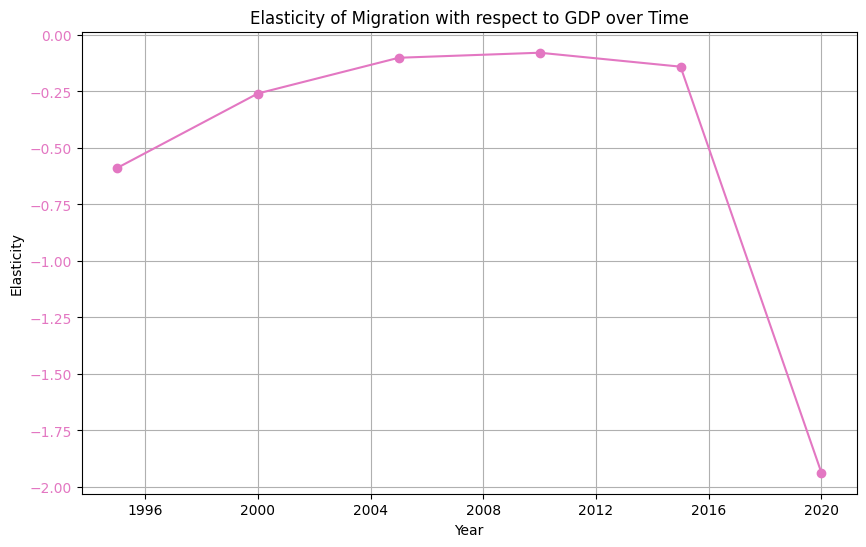

In [ ]:
# Plot Elasticity
color = 'tab:pink'

plt.figure(figsize=(10, 6))
plt.plot(gdp_india['Year'][1:], elasticity2[1:], marker='o', color=color)  # skip the first year as its YoY is NaN
plt.xlabel('Year')
# Add color to y-label
plt.ylabel('Elasticity')
plt.title('Elasticity of Migration with respect to GDP over Time')
plt.grid(True)  # Add grid lines
# If you want to change tick colors too
ax1 = plt.gca()
ax1.tick_params(axis='y', labelcolor=color)
plt.show()